In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
import json

# Specify the path to the JSON file
file_path = "./model_params/idmt-10/results.json"

# Load the JSON file
with open(file_path, "r") as json_file:
    data = json.load(json_file)

# pretty_json = json.dumps(data, indent=4)
# print(pretty_json)


In [57]:
model_classes = list(data.keys())
print(model_classes)

lrs = list(data[model_classes[0]].keys())
print(lrs)

momenta = list(data[model_classes[0]][lrs[0]].keys())
print(momenta)

['shallow', 'deep', 'autoencoder', 'deep w/ 2 HL']
['0.1', '0.01', '0.001', '0.0001', '1e-05', '1e-06']
['0.9']


In [43]:
accuracies = data[model_classes[0]][lrs[0]][momenta[0]]['accuracies']
len(accuracies)

11

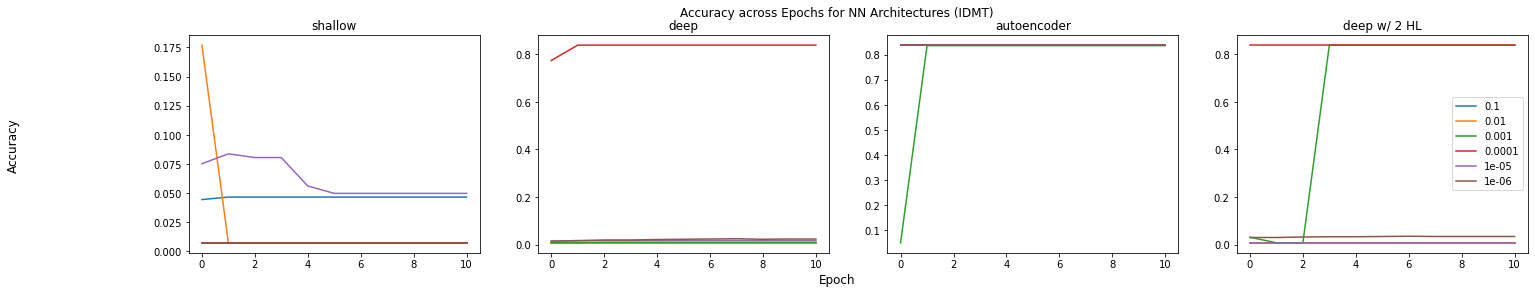

In [77]:
n = len(model_classes)
fig,axes = plt.subplots(1,n,figsize=(6*n,4))

for i,model in enumerate(model_classes):
    for lr in lrs:
        accuracies = data[model][lr][momenta[0]]['accuracies']
        # print(lr,accuracies)
        axes[i].plot(accuracies,label=lr)
        axes[i].set_title(model)

fig.suptitle('Accuracy across Epochs for NN Architectures (IDMT)')
fig.supxlabel('Epoch')
fig.supylabel('Accuracy')
plt.legend()

In [64]:
data[model_classes[0]][lrs[0]][momenta[0]]['accuracies']

[0.23670212765957446, 0.5481678486997635]

In [240]:
model_class_i = 1
# data[model_classes[model_class_i]].values()

attrs = list(data[model_classes[model_class_i]].values())
# list(attrs[0].values())[-1]['loss']
losses = [list(attrs[0].values())[-1]['loss'] for attr in attrs]
# losses
losses = list(zip(data[model_classes[model_class_i]].keys(),losses))

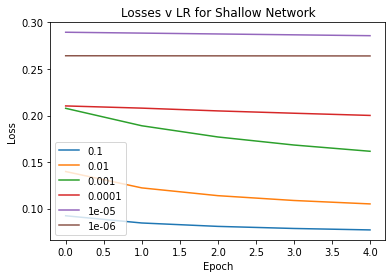

In [241]:
model_class_i = 0

attrs = list(data[model_classes[model_class_i]].values())
losses = [list(attr.values())[-1]['loss'] for attr in attrs]
losses = list(zip(data[model_classes[model_class_i]].keys(),losses))

for lr,loss in losses:
    plt.plot(loss,label=f'{lr}')

plt.title('Losses v LR for Shallow Network')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

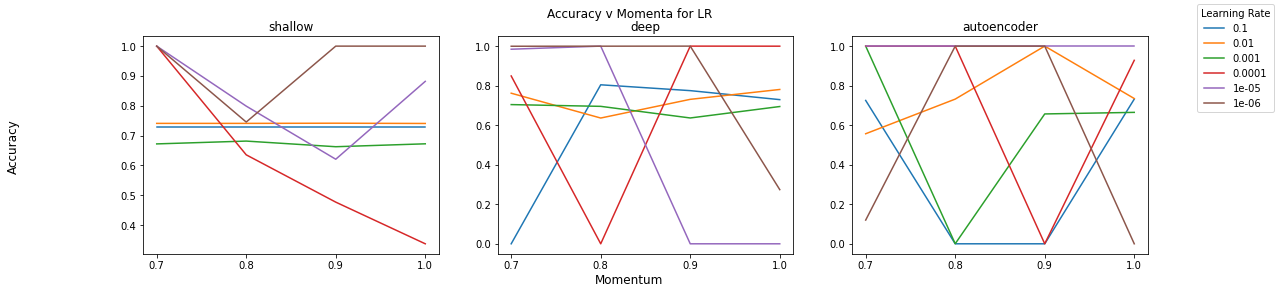

In [242]:
def plot_lr_on_momentum():
    x = range(len(momenta))
    fig, axes = plt.subplots(1,len(model_classes),figsize=(6*len(model_classes),4))

    for model_class_i,model_class in enumerate(model_classes):

        model_attr = data[model_class]

        ax = axes[model_class_i]
        ax.set_xticks(x,momenta)
        ax.set_title(model_class)

        for lr in lrs:

            # lr_attr = model_attr[lr]
            # accuracies = [attr['accuracy'] for attr in lr_attr.values()]
            
            accuracies = [model_attr[lr][momentum]['accuracy'] for momentum in momenta]

            ax.plot(x,accuracies,label=lr if model_class_i == 0 else None)

    fig.suptitle('Accuracy v Momenta for LR')
    fig.supxlabel('Momentum')
    fig.supylabel('Accuracy')
    fig.legend(title='Learning Rate')

plot_lr_on_momentum()

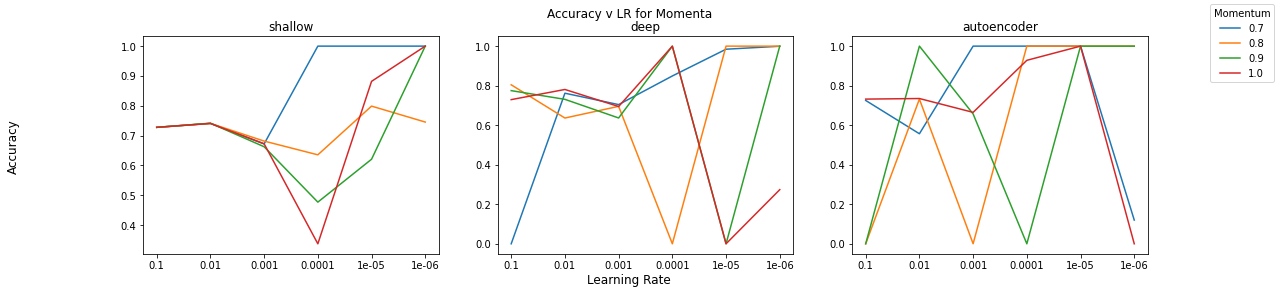

In [243]:
def plot_lr_on_momentum():
    x = range(len(lrs))
    fig, axes = plt.subplots(1,len(model_classes),figsize=(6*len(model_classes),4))

    for model_class_i,model_class in enumerate(model_classes):

        model_attr = data[model_class]

        ax = axes[model_class_i]
        ax.set_xticks(x,lrs)
        ax.set_title(model_class)

        for momentum in momenta:

            accuracies = [model_attr[lr][momentum]['accuracy'] for lr in lrs]

            ax.plot(x,accuracies,label=momentum if model_class_i == 0 else None)

    fig.suptitle('Accuracy v LR for Momenta')
    fig.supxlabel('Learning Rate')
    fig.supylabel('Accuracy')
    fig.legend(title='Momentum')

plot_lr_on_momentum()

In [244]:
data

{'shallow': {'0.1': {'0.7': {'accuracy': 0.7275413711583925,
    'loss': [0.09194837510585785,
     0.08441038429737091,
     0.08084149658679962,
     0.07864059507846832,
     0.07711149007081985]},
   '0.8': {'accuracy': 0.7275413711583925,
    'loss': [0.09173491597175598,
     0.08443418145179749,
     0.08095443248748779,
     0.07879981398582458,
     0.07729355990886688]},
   '0.9': {'accuracy': 0.7275413711583925,
    'loss': [0.09188218414783478,
     0.08440795540809631,
     0.08082996308803558,
     0.07862527668476105,
     0.07709507644176483]},
   '1.0': {'accuracy': 0.7275413711583925,
    'loss': [0.09233100712299347,
     0.08458224684000015,
     0.08092987537384033,
     0.07868875563144684,
     0.07713671028614044]}},
  '0.01': {'0.7': {'accuracy': 0.7408392434988179,
    'loss': [0.146706685423851,
     0.1253882348537445,
     0.11548055708408356,
     0.10965671390295029,
     0.10569173097610474]},
   '0.8': {'accuracy': 0.7408392434988179,
    'loss': [0.143